TLDR 31st March 2017: Turned out to be a pretty bad auto-encoder #DeepLearningNoob

# Fetch Data

In [39]:
from sklearn.datasets.mldata import fetch_mldata

In [144]:
mnist= fetch_mldata('mnist-original', data_home='/Users/ankushchoubey/Desktop/')
mnist.data.shape
mnist.data[-1]
mnist.target[-1]
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [41]:
list_of_points = mnist.data[1]

# Visualize Image

In [ ]:
from PIL import Image

In [138]:
def visualize_data(point):
    image = Image.new('I', (28,28))
    image.putdata(point)
    return image

In [44]:
visualize_data(list_of_points).show()

# Build a NN

In [200]:
from keras.models import Sequential
auto_encoder = Sequential()

In [201]:
from keras.layers import Dense

# 3 Layers with dimensions of input matching dimensions of output and middle layer to be smaller

In [202]:
auto_encoder.add(Dense(300, input_dim=784, activation='relu'))
#auto_encoder.add(Dense(300, activation='sigmoid'))
auto_encoder.add(Dense(784, activation='relu'))

# NN Visualization

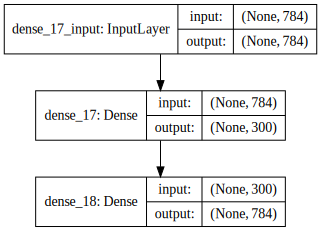

In [203]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(auto_encoder,show_shapes=True).create(prog='dot', format='svg'))

In [204]:
auto_encoder.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [163]:
data = mnist.data

# Train Test Split

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.1, random_state=42)

In [217]:
auto_encoder.fit(X_train, X_train, nb_epoch=5, batch_size=10)

Epoch 1/5
  360/63000 [..............................] - ETA: 29s - loss: -123.6714 - acc: 0.6588

/anaconda3/envs/data_science/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


63000/63000 [==============================] - 26s 416us/step - loss: -127.2292 - acc: 0.6554
Epoch 2/5
63000/63000 [==============================] - 26s 416us/step - loss: -127.2292 - acc: 0.6554
Epoch 3/5
63000/63000 [==============================] - 26s 415us/step - loss: -127.2292 - acc: 0.6554
Epoch 4/5
63000/63000 [==============================] - 26s 417us/step - loss: -127.2292 - acc: 0.6554
Epoch 5/5
63000/63000 [==============================] - 26s 418us/step - loss: -127.2292 - acc: 0.6554


In [206]:
index = -5
target = mnist.target[index]
print(target)
data1 = np.array(data[index])
visualize_data(data1).show()

9.0


In [83]:
import numpy as np
type(data)

numpy.ndarray

# Predict

In [218]:
prediction = auto_encoder.predict(np.array([data1]))[0]*1
prediction

array([   0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
          0.     ,    0.     ,    0.     , 1411.5414 ,    0.     ,
          0.     ,    0.     ,  423.37775,    0.     ,    0.  

In [219]:
b = visualize_data(prediction)

In [220]:
b.show()